In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report




In [2]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and labels

In [5]:
# Standardize features (KNN works better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train KNN classifier (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
# Predict on test data
y_pred = knn.predict(X_test)


In [13]:
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



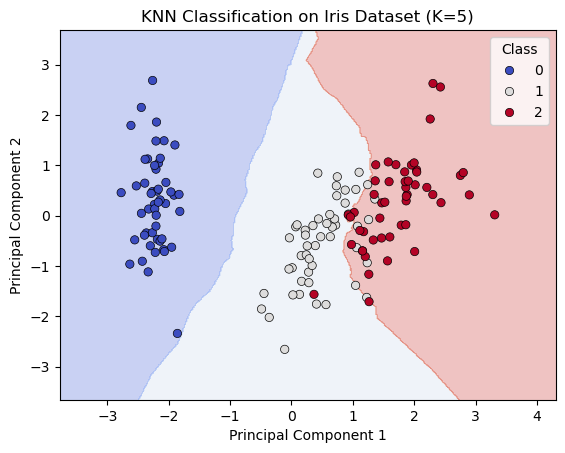

In [15]:
# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the grid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))  # Transform back to original space
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Classification on Iris Dataset (K=5)")
plt.legend(title="Class")
plt.show()

Regressor


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [21]:
# Load California Housing dataset (similar to Boston Housing)
housing = fetch_california_housing()
X, y = housing.data, housing.target  # Features and target price


In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
# Train KNN regressor (K=5)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)


KNeighborsRegressor()

In [29]:
# Predict house prices
y_pred = knn_reg.predict(X_test)


In [31]:
# Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.4338108260898032
R² Score: 0.6689500504856482


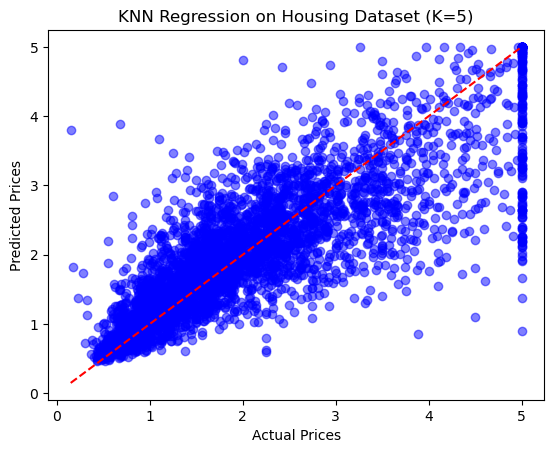

In [33]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN Regression on Housing Dataset (K=5)")
plt.show()
